In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df_train = pd.read_csv("../../data/supermarket-sales/train.csv")
df_test = pd.read_csv("../../data/supermarket-sales/test.csv")

In [3]:
df_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,6.800000,0.037490,48.6034,2004,291.6204,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,15.600000,0.172597,114.8518,1997,2163.1842,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,12.911575,0.054721,107.8254,1985,2387.5588,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,11.800000,0.098312,81.4618,1998,161.1236,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,17.850000,0.046600,125.1388,2004,1981.4208,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [4]:
df_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,18.100,0.022526,95.0094,2007,1713.7692,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,6.615,0.093575,199.4426,2002,3361.6242,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,11.850,0.050187,164.1526,2002,3124.5994,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,13.500,0.159969,147.6102,1999,1603.9122,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
4,14.000,0.029769,145.4786,1999,1300.3074,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [5]:
df_train.shape

(1364, 36)

In [6]:
df_test.shape

(341, 36)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      1364 non-null   float64
 1   Item_Visibility                  1364 non-null   float64
 2   Item_MRP                         1364 non-null   float64
 3   Outlet_Establishment_Year        1364 non-null   int64  
 4   Item_Outlet_Sales                1364 non-null   float64
 5   Item_Fat_Content_LF              1364 non-null   int64  
 6   Item_Fat_Content_Low Fat         1364 non-null   int64  
 7   Item_Fat_Content_Regular         1364 non-null   int64  
 8   Item_Fat_Content_low fat         1364 non-null   int64  
 9   Item_Fat_Content_reg             1364 non-null   int64  
 10  Item_Type_Baking Goods           1364 non-null   int64  
 11  Item_Type_Breads                 1364 non-null   int64  
 12  Item_Type_Breakfast 

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      341 non-null    float64
 1   Item_Visibility                  341 non-null    float64
 2   Item_MRP                         341 non-null    float64
 3   Outlet_Establishment_Year        341 non-null    int64  
 4   Item_Outlet_Sales                341 non-null    float64
 5   Item_Fat_Content_LF              341 non-null    int64  
 6   Item_Fat_Content_Low Fat         341 non-null    int64  
 7   Item_Fat_Content_Regular         341 non-null    int64  
 8   Item_Fat_Content_low fat         341 non-null    int64  
 9   Item_Fat_Content_reg             341 non-null    int64  
 10  Item_Type_Baking Goods           341 non-null    int64  
 11  Item_Type_Breads                 341 non-null    int64  
 12  Item_Type_Breakfast   

In [9]:
# Check for null values
df_train.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
df_test.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
df_train.duplicated().sum()

0

In [15]:
df_test.duplicated().sum()

0

In [11]:
def fix_columns(df):
    df.columns = [col.lower().replace(" ", "_") for col in df.columns]

In [12]:
fix_columns(df_train)
fix_columns(df_test)

In [13]:
df_train.head()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales,item_fat_content_lf,item_fat_content_low_fat,item_fat_content_regular,item_fat_content_low_fat,item_fat_content_reg,...,outlet_size_high,outlet_size_medium,outlet_size_small,outlet_location_type_tier_1,outlet_location_type_tier_2,outlet_location_type_tier_3,outlet_type_grocery_store,outlet_type_supermarket_type1,outlet_type_supermarket_type2,outlet_type_supermarket_type3
0,6.800000,0.037490,48.6034,2004,291.6204,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,15.600000,0.172597,114.8518,1997,2163.1842,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,12.911575,0.054721,107.8254,1985,2387.5588,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,11.800000,0.098312,81.4618,1998,161.1236,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,17.850000,0.046600,125.1388,2004,1981.4208,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [16]:
target_column = "item_outlet_sales"

In [17]:
y_train = df_train[target_column].values
y_test = df_test[target_column].values

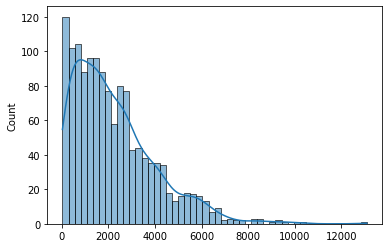

In [24]:
sns.histplot(y_train, bins=50, kde=True)
plt.show()

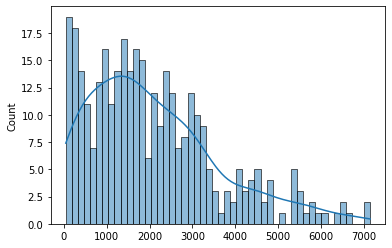

In [23]:
sns.histplot(y_test, bins=50, kde=True)
plt.show()

Mostly the sales is rightly-skewed.

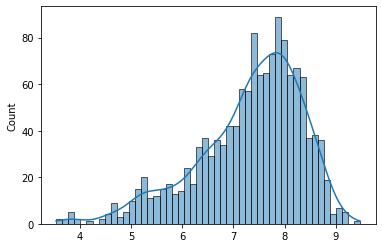

In [25]:
sns.histplot(np.log1p(y_train), bins=50, kde=True)
plt.show()

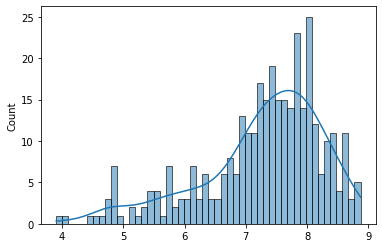

In [26]:
sns.histplot(np.log1p(y_test), bins=50, kde=True)
plt.show()

## Modeling

In [28]:
X = df_train.drop(target_column, axis=1).values

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y_train, test_size=0.2, random_state=41)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(1091, 35) (1091,)
(273, 35) (273,)


### Linear Regression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)
y_test_pred = lr.predict(df_test.drop(target_column, axis=1).values)

In [38]:
def display_rmse(y_true, y_pred, msg:str):
    print(f"{msg} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}")

In [39]:
display_rmse(y_train, y_train_pred, "Train")
display_rmse(y_val, y_val_pred, "Val")

Train RMSE: 1138.9276720301855
Val RMSE: 1146.8053142043573


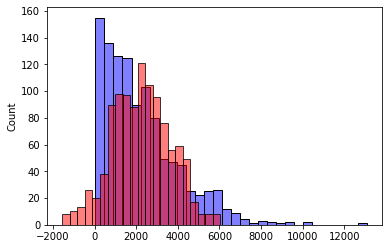

In [36]:
sns.histplot(y_train, color='blue', alpha=0.5)
sns.histplot(y_train_pred, color='red', alpha=0.5)
plt.show()

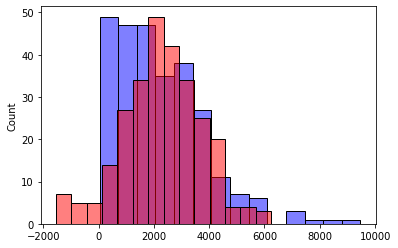

In [37]:
sns.histplot(y_val, color='blue', alpha=0.5)
sns.histplot(y_val_pred, color='red', alpha=0.5)
plt.show()